In [27]:
import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, clear_output
from time import sleep
from collections import Counter

# Day 6 Chronal Coordinates

We have a list of coordinates, and have to figure out which one is safe

In [23]:
inp = utils.get_input(6).splitlines()
inp[:5]

['78, 335', '74, 309', '277, 44', '178, 286', '239, 252']

In [4]:
test_inp = """1, 1
1, 6
8, 3
3, 4
5, 5
8, 9""".splitlines()
test_inp[0].split(", ")

['1', '1']

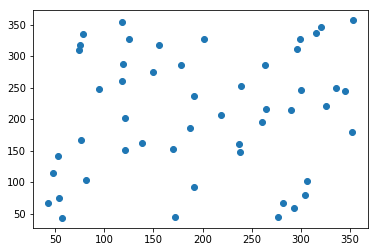

In [86]:
def process_input(inp=test_inp):
    """takes in input string and returns x and y coordinate lists"""
    xx, yy = [], []
    
    for point in inp:
        x, y = point.split(", ")
        xx.append(int(x))
        yy.append(int(y))
        
    pairs = list(zip(xx, yy))
        
    return xx, yy, pairs

xx, yy, pairs = process_input(inp)
plt.scatter(xx, yy);

Now i'm going to make a empty grid and place every point on it:

In [87]:
def make_grid(xx=xx, yy=yy):
    grid = np.zeros(shape=(max(yy)+2, max(xx)+2), dtype="int")
    for i, (x, y) in enumerate(zip(xx, yy)):
        grid[y,x] = i + 1
    
    return grid

grid = make_grid()

In [88]:
def nodes_on_edges(grid=grid):
    edges = set()
    edges = edges.union(grid[:,0]).union(grid[:,-1])
    edges = edges.union(grid[0]).union(grid[-1])
    return edges

edges = nodes_on_edges()
edges

{0}

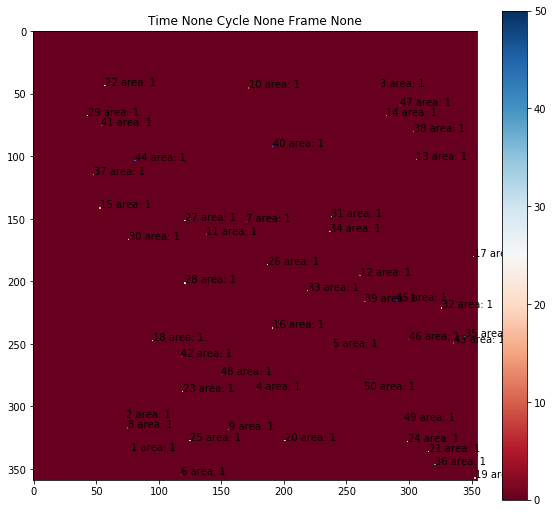

In [89]:
def plot(grid=grid, pairs=pairs, time=None, cycle=None, frame=None):
    clear_output(wait=True)
    
    fig, ax = plt.subplots(figsize=(9,9))
    ax.set_title(f"Time {time} Cycle {cycle} Frame {frame}")
    pos = ax.imshow(grid, origin="upper", cmap=plt.get_cmap("RdBu"))
    fig.colorbar(pos, ax=ax, fraction=0.066)
    
    edges = nodes_on_edges(grid)
    
    for i, pair in enumerate(pairs):
        if i + 1 in edges:
            ax.annotate(f"{i+1} is infinite", pair)
        else:
            area = (grid == i+1).sum()
            ax.annotate(f"{i+1} area: {area}", pair)

    
    plt.show()

plot()

Now I want to fill in the grid so each zero num is labelled the number of the closest pair, so first up a func to return the manhatten distance b/w two coordinates:

In [90]:
def manhatten_dist(p1, p2):
    """takes in two points, returns the mahatten distance"""
    return abs(p2[0] - p1[0]) + abs(p2[1] - p1[1])

assert manhatten_dist((1,1), (1,1)) == 0
assert manhatten_dist((1,1), (2,1)) == 1
assert manhatten_dist((1,1), (3,2)) == 3

In [91]:
def find_closest_pair(xy, pairs=pairs):
    """
    takes in a coordinate, a list of pairs, and returns the number
    of the closest pair"""
    
    distances = [manhatten_dist(xy, p) for p in pairs]
    m = np.argmin(distances)
    if distances.count(distances[m]) == 1:
        return m + 1
    else:
        return 0
    
find_closest_pair((0,0)), find_closest_pair((9,0))

(22, 22)

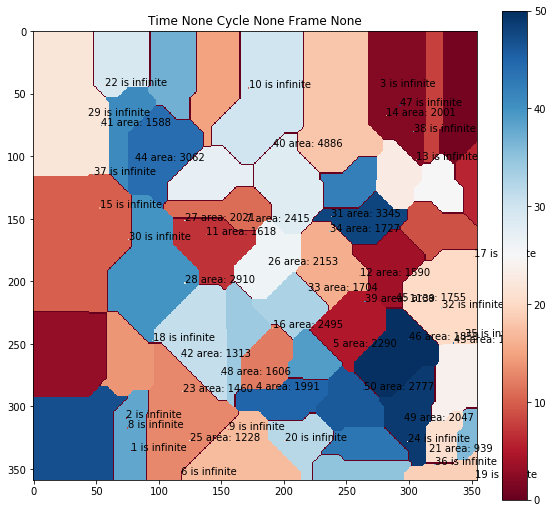

In [92]:
for xy in np.ndindex(grid.shape):
    if grid[xy] == 0:
        grid[xy] = find_closest_pair(xy, pairs)
        
plot()

Now to put it all together to solve the problem:

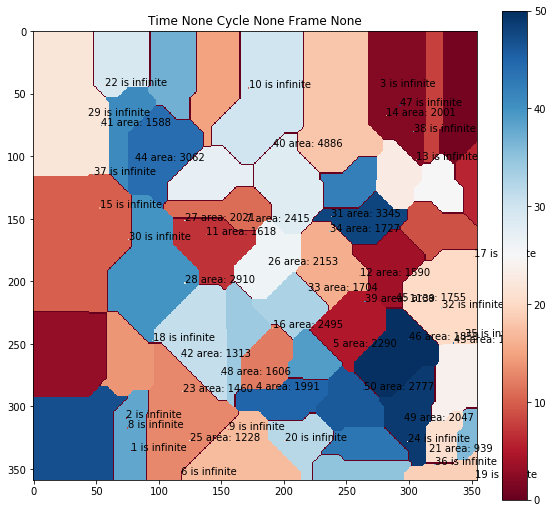

node 40 has the most area of 4886


In [93]:
def solve(inp=test_inp):
    xx, yy, pairs = process_input(inp)
    grid = make_grid(xx, yy)
    plot(grid, pairs=pairs)
    
    for xy in np.ndindex(grid.shape):
        if grid[xy] == 0:
            grid[xy] = find_closest_pair(xy, pairs)
    
    edges = nodes_on_edges(grid)
    
    areas = {}

    for pos in set(np.unique(grid)) - edges:
        area = (grid == pos).sum()
        areas[pos] = area

    n, a = Counter(areas).most_common(1)[0]
    
    plot(grid, pairs=pairs)
    
    print(f"node {n} has the most area of {a}")
    
solve(inp)

So the right answer is `4887` - so investigate why my solution is off by 1 for the input - it does work for the real input though.

# Part 2

Now change the safe calc so each grid region contains its total distance to all the nodes.

**What is the size of the region containing all locations which have a total distance to all given coordinates of less than 10000?**

In [113]:
def get_distance(xy, pairs=pairs, allowed_distance=10000):
    """
    takes in a coordinate, pairs, returns -1000 if total_distance to all pairs
    < allowed"""
    
    distances = [manhatten_dist(xy, p) for p in pairs]
    
    if sum(distances) < allowed_distance:
        return -1000
    else:
        return 0
    
get_distance((0,0)), get_distance((9,0))

(0, 0)

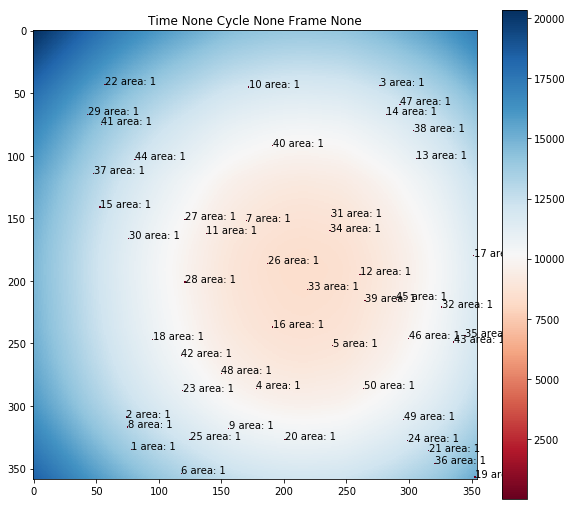

node 9593 has the most area of 66


In [114]:
def solve2(inp=test_inp):
    xx, yy, pairs = process_input(inp)
    grid = make_grid(xx, yy)
    plot(grid, pairs=pairs)
    
    for xy in np.ndindex(grid.shape):
        grid[xy] = get_distance(xy, pairs)
    
    edges = nodes_on_edges(grid)
    
    areas = {}

    for pos in set(np.unique(grid)) - edges:
        area = (grid == pos).sum()
        areas[pos] = area

    n, a = Counter(areas).most_common(1)[0]
    
    plot(grid, pairs=pairs)
    
    print(f"node {n} has the most area of {a}")
    
solve(inp)

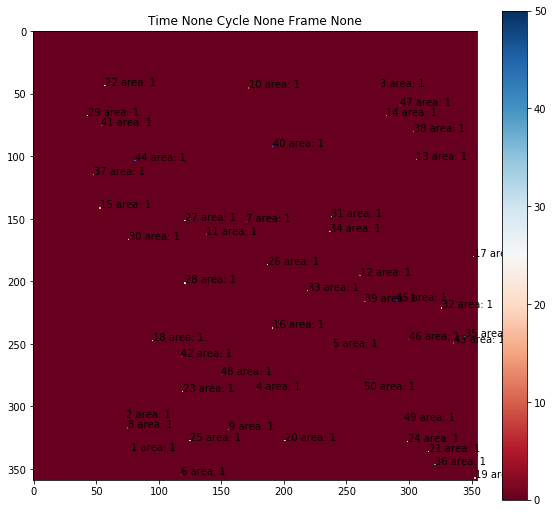

In [115]:
xx, yy, pairs = process_input(inp)
grid = make_grid(xx, yy)
plot(grid, pairs=pairs)

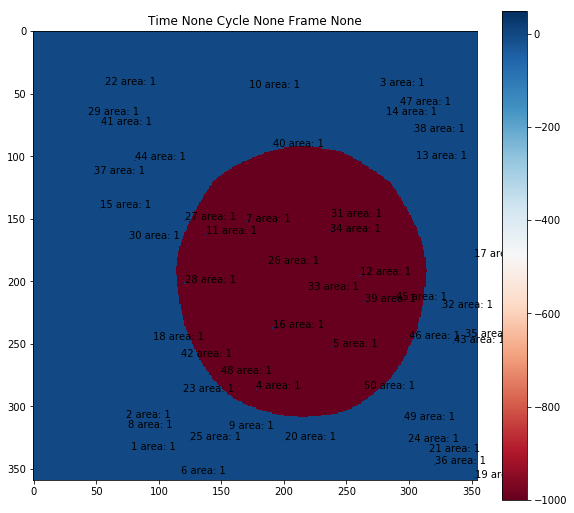

node -1000 has the most area of 34080


In [116]:
for xy in np.ndindex(grid.shape):
    if grid[xy] == 0:
        grid[xy] = get_distance(xy, pairs)

edges = nodes_on_edges(grid)

areas = {}

for pos in set(np.unique(grid)) - edges:
    area = (grid == pos).sum()
    areas[pos] = area

n, a = Counter(areas).most_common(1)[0]

plot(grid, pairs=pairs)

print(f"node {n} has the most area of {a}")